In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))
from mpmath import mp
#from mpmath import e

In [21]:
2 * m.sqrt(10)

6.324555320336759

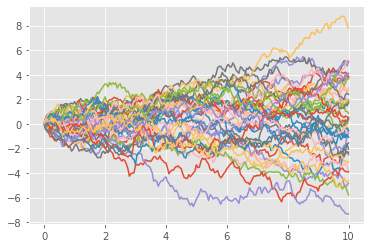

In [19]:
delta = 0.05; iters = 200; 
for n in range(40):
    states = [0]; times = [0]
    for it in range(iters):
        states.append(states[-1] + stat.norm(0,m.sqrt(delta)).rvs(size = 1)[0])

    plt.plot(np.arange(0, iters+1) * delta, states)
plt.show()

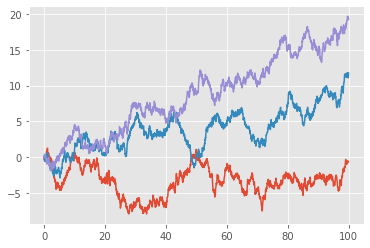

In [17]:
delta = 0.05; iters = 2000; 
for n in range(3):
    states = [0]; times = [0]
    for it in range(iters):
        states.append(states[-1] + stat.norm(0,m.sqrt(delta)).rvs(size = 1)[0])

    plt.plot(np.arange(0, iters+1) * delta, states)
plt.show()

# 2

In [78]:
delta = 0.05; iters = 200;
zeros_est = np.zeros((iters, 400))
for n in range(400):
    states = [0]; times = [0]
    for it in range(iters):
        states.append(states[-1] + stat.norm(0,m.sqrt(delta)).rvs(size = 1)[0])
        if (states[-1] * states[-2] <= 0):
            zeros_est[it][n] += 1

    #plt.plot(np.arange(0, iters+1) * delta, states)
#plt.show()
zeros_est

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

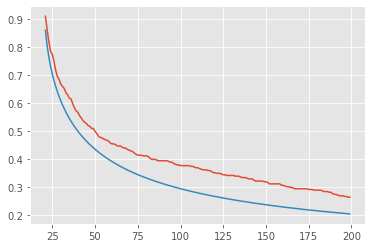

In [79]:
a = 1;
A = np.arange(16).reshape((4,4))
A[:,0:2]

EFR = []
for i in range(21,200):
    counter = 0
    for j in range(400):
        if np.sum(zeros_est[20:i, j]) > 0:
            counter += 1
    EFR.append(1 - counter / 400)
    
plt.plot(range(21,200), EFR)
plt.plot(range(21,200), [1 - 2 / m.pi * m.acos(m.sqrt(20 / elem)) for elem in range(21,200)])

In [71]:
i = 22
len(zeros_est[ : , 20:22])
zeros_est[20:i, :]
np.sum(zeros_est[20:i, 10])

1.0